# Reporte de métricas y conclusiones

We chose the XGBoost model because eventhough he was doing slightly worst (0.002) than the SVC model, it was more efficient as it trained faster. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import learning_curve
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
# initiate the chosen model
df = pd.read_csv('final.csv')
etiqueta = {1: 0, 2: 0, 4: 1, 5: 1}
df['etiqueta'] = df['overall'].map(etiqueta)
X = df['reviewText']
y = df['etiqueta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
vectorizer = TfidfVectorizer(min_df=50, max_df=0.90, ngram_range=(1,4), max_features=2000)
vectorizer.fit(X) 
X_train_tf = vectorizer.transform(X_train)  
X_train_tf = X_train_tf.todense()
X_test_tf = vectorizer.transform(X_test) 
X_test_tf = X_test_tf.todense()

xgb_model = XGBClassifier(
    n_estimators=1000,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=0.5,
    random_state=42
)
xgb_model.fit(X_train_tf, y_train)
y_pred = xgb_model.predict(X_test_tf)

# Confusion matrix

In [ ]:
# Calculate accuracy and print it
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate a confusion matrix and print it
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

Accuracy: 0.8520
Confusion matrix:
[[1646  321]
 [ 271 1762]]


As you can see, the accuracy is 85.2% which means that it correctly classified 85.2% of the test data. The confusion matrix shows that your model made 1646 true negative predictions and 1762 true positive predictions, which indicates that it is able to correctly identify both classes. 

# Roc Curve 

AUC: 0.8518


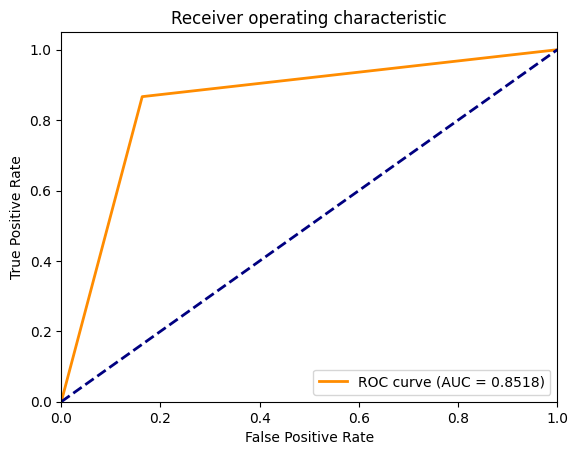

In [ ]:
# Generate a ROC curve and print AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Accuracy, recall and F1-score  metrics

In [ ]:
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)

Precision: 0.8458953432549208
Recall: 0.8666994589276931
F1-score: 0.8561710398445093


# Precision-Recall curve

c:\Users\Stephanie\OneDrive\Coding\Projets\2302_NLPHW\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


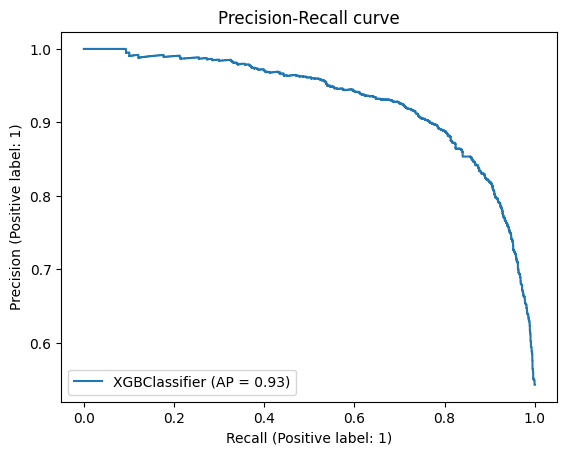

In [ ]:
# Get precision, recall and threshold values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
disp = plot_precision_recall_curve(xgb_model, X_test_tf, y_test)
disp.ax_.set_title('Precision-Recall curve')
plt.show()

# Learning curve

<module 'matplotlib.pyplot' from 'c:\\Users\\Stephanie\\OneDrive\\Coding\\Projets\\2302_NLPHW\\env\\lib\\site-packages\\matplotlib\\pyplot.py'>

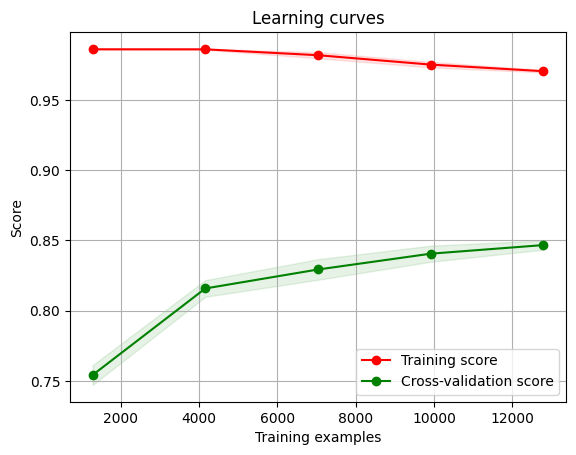

In [4]:
# Define function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
plot_learning_curve(xgb_model, "Learning curves", X_train_tf, y_train, cv=5)

# Testing on new data

In [7]:
nltk.download('stopwords')
stopwords = stopwords.words('english')
stopwords = set(stopwords) - set(['not', 'no', 'nor', 'but'])
nltk.download('punkt')  
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
  # get all the text in lowercase letters
  text = text.lower()
  # remove punctuation 
  text = text.translate(str.maketrans("", "", string.punctuation))
  # tokenize the text 
  text = nltk.word_tokenize(text)
  # remove stopwords
  text =  [word for word in text if word not in stopwords]
  # lemmatize the text 
  text = [lemmatizer.lemmatize(token) for token in text]
  return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stephanie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Stephanie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Stephanie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Stephanie\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [8]:
texto = "It was okay but in the end I wasn't a huge fan"

def analizar_texto(text):
    text = preprocess(text)
    vectorized_sentence = vectorizer.transform([' '.join(text)])
    vectorized_sentence = vectorized_sentence.todense()
    predicted_sentiment = xgb_model.predict(vectorized_sentence)
    if predicted_sentiment[0] == 1:
        print("Positive")
    else:
        print("Negative")

analizar_texto(texto)

Negative


In [9]:
analizar_texto("This game is amazing! I love the graphics and the gameplay is so smooth.")
analizar_texto("I was really disappointed with this game. The controls were clunky and the story was uninteresting.")
analizar_texto("I'm not a huge fan of first-person shooters, but this game blew me away. The mechanics were innovative and the story was engaging.")
analizar_texto("I found this game to be too easy. I beat it in a few hours and there wasn't much replay value.")
analizar_texto("This game is a buggy mess. I encountered so many glitches and crashes while playing.")

Positive
Negative
Negative
Positive
Negative


In [12]:
analizar_texto('It was too hard, I thought I could never finish it.')
analizar_texto("I don't like this kind of game normally but this one was different")
analizar_texto('This game was easy and has only okay graphics.')

Negative
Negative
Positive


After training and evaluating the sentiment analysis model using XGBoost on 20,000 Amazon reviews of video games, we saw that the model achieved an accuracy of 0.852, which is relatively high, indicating that it is effective at predicting the sentiment of reviews. The confusion matrix showed that the model correctly predicted 1646 positive reviews and 1762 negative reviews. As well, it shows that the model doesn't seem to have a tendency to have more false positives or false negatives, as both types of errors occur at a similar rate. The AUC score of 0.8518 (based on the ROC curve) indicates that the model can distinguish between positive and negative reviews reasonably well. Furthermore, the precision, recall, and F1-score of the model are 0.845, 0.866, and 0.856, respectively, which is a decent performance. The precision recall curve shows an average precision (AP) of 0.93, which is also a good sign. 

However, it struggled with predicting certain types of outcomes, as evidenced by the misclassification of  those sentences 
* 'I'm not a huge fan of first-person shooters, but this game blew me away. The mechanics were innovative and the story was engaging."
* "I found this game to be too easy. I beat it in a few hours and there wasn't much replay value." 
* "I don't like this kind of game normally but this one was different." 
* 'This game was easy and has only okay graphics.' 

The misclassifications in the model could be attributed to a few reasons. In the first sentence, the model might have missed the positive sentiment due to the negation in the first part of the sentence, "I'm not a huge fan." The model may have focused on the negative words and overlooked the positive sentiment in the second half of the sentence. In the second sentence, the model may have missed the negative sentiment because it focused on the word "easy" without considering the context in which it was used.  It's possible that the model is not able to pick up on the contextual nuances that indicate that "easy" in the context of a game can be a negative thing. Indeed, as we saw in the analysis of the word2vec embeddings, there was a correlation between "fun" and "challenging," which suggests that in the context of a game, "easy" might be interpreted as not fun. Ideally, the model should be able to pick up on these types of contextual cues and make more accurate predictions. However, this may be challenging given the complexity of natural language and the many factors that can influence the meaning of a sentence (especially sarcasm which might be prevalant in this community). The third sentence has a similar structure as the first sentence, with a negation at the beginning that might have influenced the model's decision. The last sentence might have been misclassified due to the ambiguity of the phrase "okay graphics." The model might have interpreted it as a positive aspect of the game, rather than a negative one. These misclassifications highlight the limitations of the model and the importance of taking into account the context and nuances of language to improve the accuracy of sentiment analysis.

One major weakness of the model was overfitting, as shown by the learning curve. Attempts to use regularization methods or modify gamma didn't help significantly. To address this, the model could be fed more data, as it appears to require more samples to generalize better.

Overall, the sentiment analysis model using XGBoost achieved high accuracy and good discrimination, indicating its potential for use in real-world applications. However, further efforts to improve its precision and recall and to address overfitting should be pursued. Overall, the XGBoost sentiment analysis model has good performance in classifying video game reviews as positive or negative. However, there is room for improvement, particularly in addressing the overfitting and improving the model's ability to handle negation and mixed opinions. It may also be useful to investigate other modeling approaches, such as neural networks to see if they can provide better performance. Despite these weaknesses, the model can still be useful in practice for quickly analyzing large volumes of video game reviews and identifying overall trends in sentiment.

